<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/my-keras/custum_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os,cv2
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.utils import np_utils

num_channel=1
labels_name={'cats':0,'dogs':1,'horses':2,'humans':3}

def load():
    f = np.load('./drive/My Drive/data_own_cnn/my_data.npz')
    return f['x_train'], f['y_train'], f['x_test'], f['y_test']

Using TensorFlow backend.


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam


def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), border_mode='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #model.compile(loss='categorical_crossentropy', 
    #              optimizer=sgd, metrics=["accuracy"])
    model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop', 
                metrics=["accuracy"])
    return model

def view_model(model):
    # Viewing model_configuration
    model.summary()
    model.get_config()
    model.layers[0].get_config()
    model.layers[0].input_shape			
    model.layers[0].output_shape			
    model.layers[0].get_weights()
    np.shape(model.layers[0].get_weights()[0])
    model.layers[0].trainable


In [4]:
# Import libraries
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
#K.set_image_dim_ordering('th')

num_epoch=20
num_classes = len(labels_name)

x_train, x_test, y_train, y_test = load()

model = build_model(x_train[0].shape, num_classes)
view_model(model)

hist = model.fit(x_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(x_test, y_test))

W0802 10:28:52.023694 139787363137408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
W0802 10:28:52.069725 139787363137408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 10:28:52.084147 139787363137408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 10:28:52.136742 139787363137408 depr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
__________

W0802 10:28:55.338624 139787363137408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 5s 8ms/step - loss: 1.9141 - acc: 0.2817 - val_loss: 1.3634 - val_acc: 0.2901
Epoch 2/20
646/646 [==============================] - 1s 2ms/step - loss: 1.2401 - acc: 0.4845 - val_loss: 1.1662 - val_acc: 0.4938
Epoch 3/20
646/646 [==============================] - 1s 2ms/step - loss: 1.0317 - acc: 0.6378 - val_loss: 1.1323 - val_acc: 0.4198
Epoch 4/20
646/646 [==============================] - 1s 2ms/step - loss: 0.6760 - acc: 0.7786 - val_loss: 1.0268 - val_acc: 0.5926
Epoch 5/20
646/646 [==============================] - 1s 2ms/step - loss: 0.4388 - acc: 0.8560 - val_loss: 1.3949 - val_acc: 0.5062
Epoch 6/20
646/646 [==============================] - 1s 2ms/step - loss: 0.3060 - acc: 0.9195 - val_loss: 1.4736 - val_acc: 0.5123
Epoch 7/20
646/646 [==============================] - 1s 2ms/step - loss: 0.1777 - acc: 0.9536 - val_loss: 1.3949 - val_acc: 0.5494
Epoch 8/20
646/646 [==========

In [0]:
def plot(hist, num_epoch):
	# visualizing losses and accuracy
	train_loss=hist.history['loss']
	val_loss=hist.history['val_loss']
	train_acc=hist.history['acc']
	val_acc=hist.history['val_acc']
	xc=range(num_epoch)

	plt.figure(1, figsize=(7,5))
	plt.plot(xc, train_loss)
	plt.plot(xc, val_loss)
	plt.xlabel('num of Epochs')
	plt.ylabel('loss')
	plt.title('train_loss vs val_loss')
	plt.grid(True)
	plt.legend(['train','val'])
	#print plt.style.available # use bmh, classic, ggplot for big pictures
	plt.style.use(['classic'])

	plt.figure(2, figsize=(7,5))
	plt.plot(xc, train_acc)
	plt.plot(xc, val_acc)
	plt.xlabel('num of Epochs')
	plt.ylabel('accuracy')
	plt.title('train_acc vs val_acc')
	plt.grid(True)
	plt.legend(['train','val'],loc=4)
	#print plt.style.available # use bmh, classic, ggplot for big pictures
	plt.style.use(['classic'])
	plt.show()

def evaluate(model, x_test, y_test):
	# Evaluating the model
	score = model.evaluate(x_test, y_test, verbose=0)
	print('Test Loss:', score[0])
	print('Test accuracy:', score[1])

	test_image = x_test[0:1]
	print (test_image.shape) #(1, 128, 128, 1)

	print(model.predict(test_image)) 
	# [[0.42846408 0.34022 0.13205759 0.09925821]]

	print(model.predict_classes(test_image)) #[0]
	print(y_test[0:1]) #[[1. 0. 0. 0.]]
  

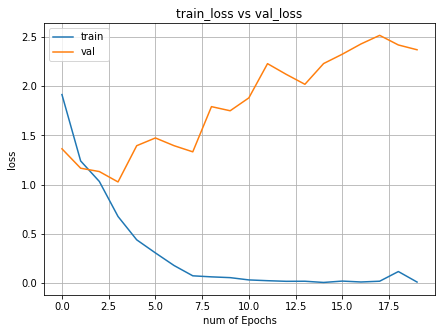

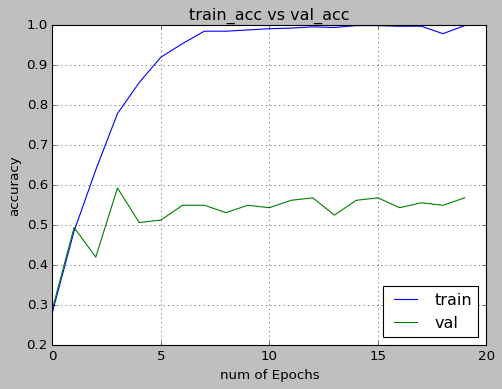

Test Loss: 2.369408130645752
Test accuracy: 0.5679012345679012
(1, 128, 128, 1)
[[0.32598832 0.5898347  0.06285855 0.0213185 ]]
[1]
[[1. 0. 0. 0.]]


In [6]:
plot(hist, num_epoch)

evaluate(model, x_test, y_test)

In [0]:
def test_new(model, num_channel):
	# Testing a new image
	test_image = cv2.imread('./drive/My Drive/data_own_cnn/humans/rider-8.jpg')
	test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
	test_image=cv2.resize(test_image, (128, 128))
	test_image = np.array(test_image)
	test_image = test_image.astype('float32')
	test_image /= 255
	#print (test_image.shape) # (128, 128)
	if num_channel==1:
		if K.image_dim_ordering()=='th':
			test_image= np.expand_dims(test_image, axis=0)
			test_image= np.expand_dims(test_image, axis=0)
		else:
			test_image= np.expand_dims(test_image, axis=3) 
			test_image= np.expand_dims(test_image, axis=0)
	else:
		if K.image_dim_ordering()=='th':
			test_image=np.rollaxis(test_image,2,0)
			test_image= np.expand_dims(test_image, axis=0)
		else:
			test_image= np.expand_dims(test_image, axis=0)
	#print (test_image.shape) # (1, 128, 128, 1)		
	# Predicting the test image
	print((model.predict(test_image)))
	print(model.predict_classes(test_image))
	return test_image

In [12]:
test_image = test_new(model, num_channel)

[[3.6220992e-08 7.3425438e-10 4.4505764e-09 1.0000000e+00]]
[3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  from ipykernel import kernelapp as app


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']

print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[1 2 0 3 2 1 2 1 2 3 0 1 0 3 0 0 3 1 0 3 2 0 0 1 3 2 1 1 3 1 0 2 0 0 2 2 0
 2 0 0 2 3 1 3 2 3 2 2 2 1 0 3 1 2 0 1 0 1 2 3 1 3 3 2 3 2 2 0 1 1 2 3 2 3
 2 3 2 1 2 0 2 2 2 0 0 0 2 2 2 1 2 2 0 0 3 3 0 2 0 0 3 0 3 2 2 0 1 1 1 1 0
 1 2 3 0 3 1 0 2 0 2 0 1 3 1 3 2 1 2 3 0 0 1 2 1 3 2 0 2 1 2 3 2 2 3 0 3 1
 0 3 0 2 1 2 0 0 3 2 2 0 3 3]
                 precision    recall  f1-score   support

  class 0(cats)       0.47      0.61      0.53        33
  class 1(Dogs)       0.52      0.35      0.42        48
class 2(Horses)       0.61      0.78      0.68        40
class 3(Humans)       0.69      0.59      0.63        41

       accuracy                           0.57       162
      macro avg       0.57      0.58      0.56       162
   weighted avg       0.57      0.57      0.56       162

[[20  8  4  1]
 [13 17 12  6]
 [ 3  2 31  4]
 [ 7  6  4 24]]


Confusion matrix, without normalization
[[20  8  4  1]
 [13 17 12  6]
 [ 3  2 31  4]
 [ 7  6  4 24]]


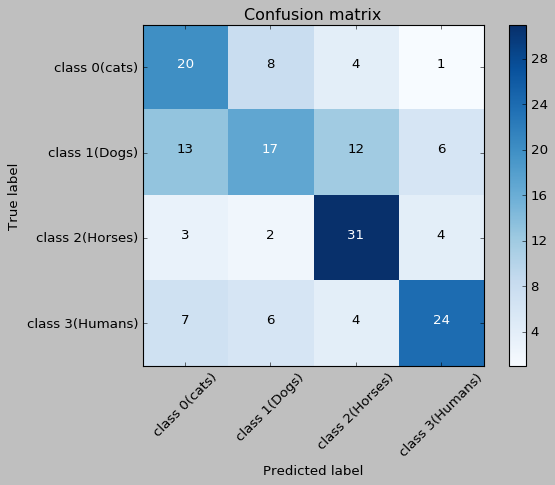

In [16]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

(1, 1, 126, 126, 32)
(126, 126, 32)
(126, 126, 32)


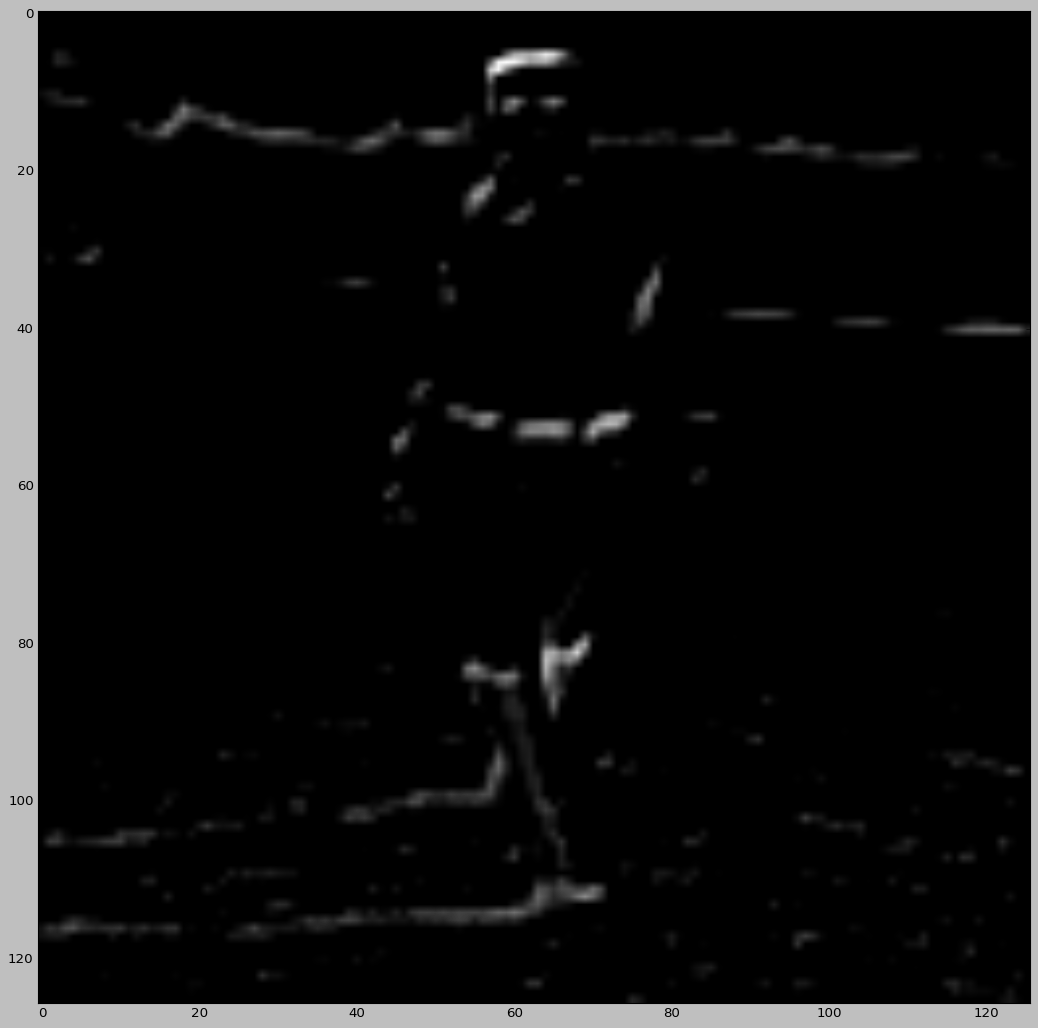

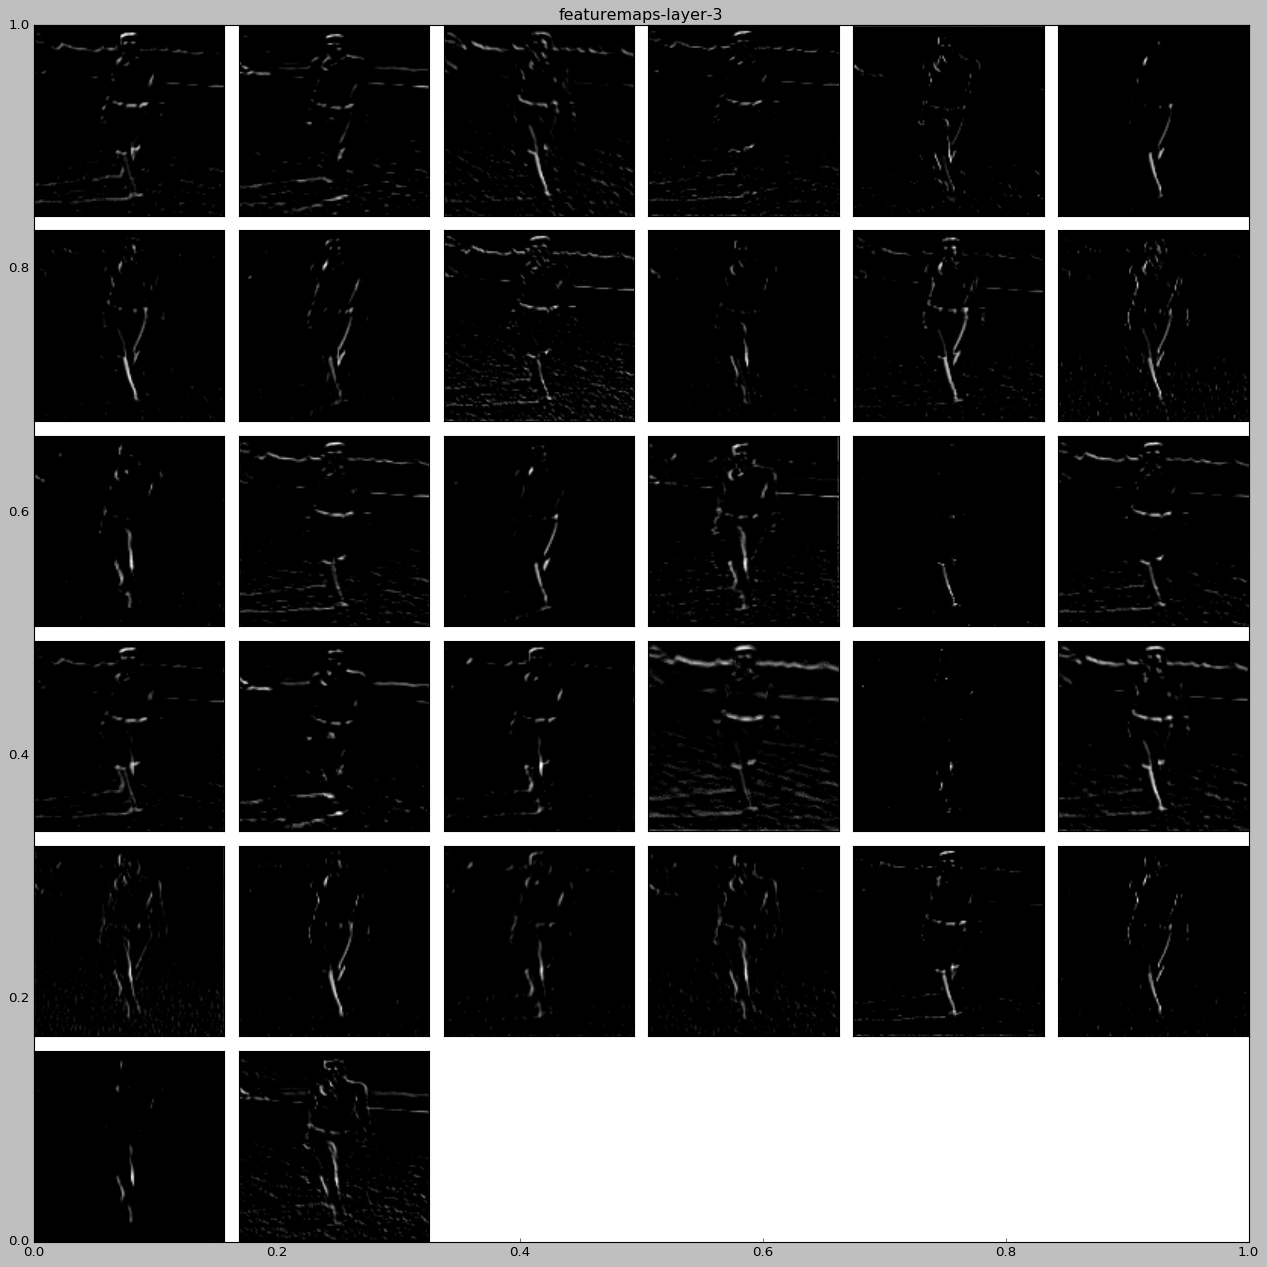

In [9]:
# Visualizing the intermediate layer
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()